# Import libraries

In [21]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter(
    action="ignore", category=(FutureWarning, UserWarning, DeprecationWarning)
)

# Import Data
Import from csv and make column for avg time and key comparison

In [22]:
merge_sort_df = pd.read_csv("./data/merge_sort_with_insertion_sort_diff_s.csv")
merge_sort_df["CompareCountAvg"] = (
    merge_sort_df["CompareCount1"]
    + merge_sort_df["CompareCount2"]
    + merge_sort_df["CompareCount3"]
) / 3
merge_sort_df["timeAvg"] = (
    merge_sort_df["time1"] + merge_sort_df["time2"] + merge_sort_df["time3"]
) / 3
merge_sort_df.head()

,threshold,CompareCount1,time1,CompareCount2,time2,CompareCount3,time3,CompareCountAvg,timeAvg
0,1,460205202,4765,460200590,4737,460201917,4773,4.602026e+08,4758.333333
1,2,460205202,4058,460200590,4070,460201917,4037,4.602026e+08,4055.000000
2,3,460204554,3801,460201163,3815,460202186,3805,4.602026e+08,3807.000000
3,4,460449175,3704,460445062,3730,460445280,3705,4.604465e+08,3713.000000
4,5,462221432,3444,462217459,3429,462221383,3442,4.622201e+08,3438.333333


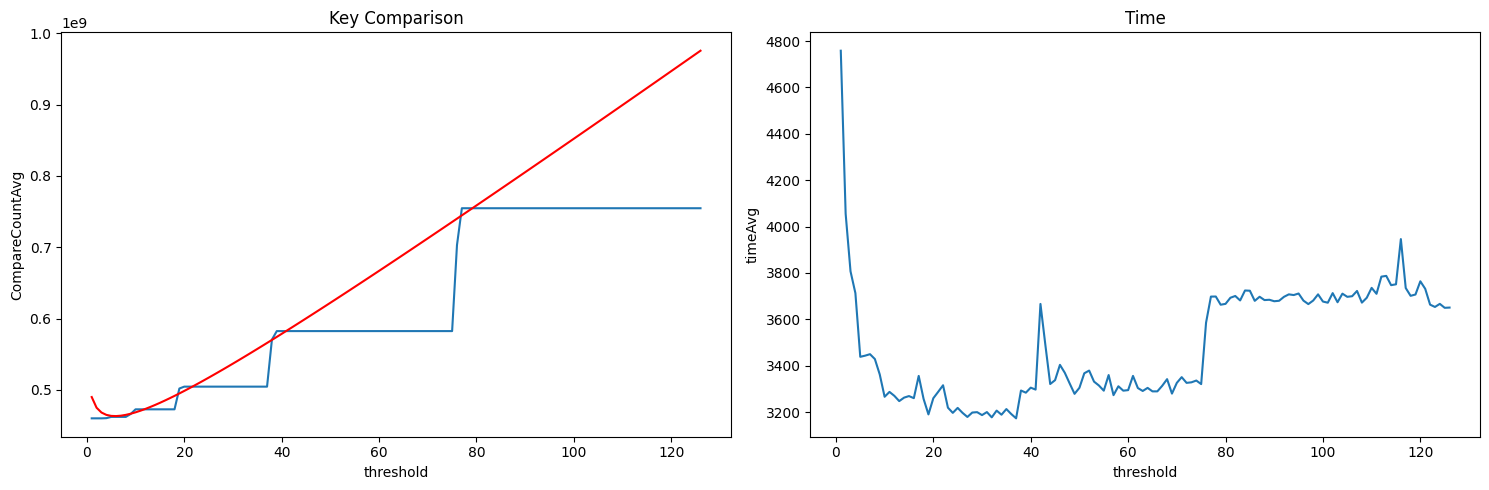

In [33]:
def predict(n, S):
    return n * np.log2(n / S) + 1 / 4 * S * n


f, ax = plt.subplots(1, 2, figsize=(15, 5))

# line plot for key comparison
s1 = plt.subplot2grid((1, 2), (0, 0))

lineKey = sb.lineplot(data=merge_sort_df, y="CompareCountAvg", x="threshold")

x = merge_sort_df["threshold"]
y = predict(20000000, merge_sort_df["threshold"])

sb.lineplot(x=x, y=y, ax=s1, color="red")


plt.title("Key Comparison")

# line plot for time
s2 = plt.subplot2grid((1, 2), (0, 1))

lineTime = sb.lineplot(data=merge_sort_df, y="timeAvg", x="threshold")
plt.title("Time")

plt.tight_layout()
plt.show()